<h1> Data Science Interview Assignment for Indeed Flex </h1>

<h2>Objectives</h2>

<li>Perform Exploration Data Analysis (EDA)</li>
<li>Data Exploration (cleaning, missing data, outliers, scaling)</li> 
<li>Feature Engineering (encoding) </li>
<li>Feature Selection (feature correlations, modeling, remodeling if needed for hyper-tuning)</li>

<h3>Import Libraries </h3>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from statsmodels.graphics.gofplots import qqplot
import statsmodels.api as sm 
from matplotlib import pylab

<h2>Understanding our Data </h2>

<h3> The Data and Comprehension of Values </h3>

In [2]:
#initialize our dataset
train_features_df = pd.read_csv('train_features.csv') # Features variables
train_salaries_df = pd.read_csv('train_salaries.csv') # Target variable
test_features_df = pd.read_csv('test_features.csv') #testing this data on our ML model

In [3]:
# examine first few lines of our data sets
train_features_df.head(10)

jobId companyId         jobType       degree      major  \
0  JOB1362684407687    COMP37             CFO      MASTERS       MATH   
1  JOB1362684407688    COMP19             CEO  HIGH_SCHOOL       NONE   
2  JOB1362684407689    COMP52  VICE_PRESIDENT     DOCTORAL    PHYSICS   
3  JOB1362684407690    COMP38         MANAGER     DOCTORAL  CHEMISTRY   
4  JOB1362684407691     COMP7  VICE_PRESIDENT    BACHELORS    PHYSICS   
5  JOB1362684407692    COMP15         MANAGER     DOCTORAL    COMPSCI   
6  JOB1362684407693    COMP15             CFO         NONE       NONE   
7  JOB1362684407694    COMP24          JUNIOR    BACHELORS  CHEMISTRY   
8  JOB1362684407695    COMP20         JANITOR  HIGH_SCHOOL       NONE   
9  JOB1362684407696    COMP41  VICE_PRESIDENT    BACHELORS  CHEMISTRY   

    industry  yearsExperience  milesFromMetropolis  
0     HEALTH               10                   83  
1        WEB                3                   73  
2     HEALTH               10                   38  
3       AUTO                8                   17  
4    FINANCE                8                   16  
5    FINANCE                2                   31  
6     HEALTH               23                   24  
7  EDUCATION                9                   70  
8  EDUCATION                1                   54  
9       AUTO               17                   68

In [4]:
train_salaries_df.head(10)

jobId  salary
0  JOB1362684407687     130
1  JOB1362684407688     101
2  JOB1362684407689     137
3  JOB1362684407690     142
4  JOB1362684407691     163
5  JOB1362684407692     113
6  JOB1362684407693     178
7  JOB1362684407694      73
8  JOB1362684407695      31
9  JOB1362684407696     104

In [5]:
 test_features_df.head(10)

jobId companyId         jobType       degree    major industry  \
0  JOB1362685407687    COMP33         MANAGER  HIGH_SCHOOL     NONE   HEALTH   
1  JOB1362685407688    COMP13          JUNIOR         NONE     NONE     AUTO   
2  JOB1362685407689    COMP10             CTO      MASTERS  BIOLOGY   HEALTH   
3  JOB1362685407690    COMP21         MANAGER  HIGH_SCHOOL     NONE      OIL   
4  JOB1362685407691    COMP36          JUNIOR     DOCTORAL  BIOLOGY      OIL   
5  JOB1362685407692    COMP40             CTO      MASTERS  COMPSCI  FINANCE   
6  JOB1362685407693    COMP32          SENIOR      MASTERS  COMPSCI  SERVICE   
7  JOB1362685407694    COMP11             CEO    BACHELORS  BIOLOGY  SERVICE   
8  JOB1362685407695    COMP39         MANAGER     DOCTORAL  PHYSICS   HEALTH   
9  JOB1362685407696    COMP22  VICE_PRESIDENT         NONE     NONE     AUTO   

   yearsExperience  milesFromMetropolis  
0               22                   73  
1               20                   47  
2               17                    9  
3               14                   96  
4               10                   44  
5                6                   23  
6                6                   32  
7                9                   73  
8                6                   78  
9               23                   97

In [6]:
# examine size of rows and columns
print(train_features_df.shape)
print(train_salaries_df.shape)
print(test_features_df.shape)

(1000000, 8)
(1000000, 2)
(1000000, 8)


In [7]:
# basic stats of our data
print(train_features_df.describe())
print('---------------------------------------------------------------------------------')
print(train_salaries_df.describe())
print('---------------------------------------------------------------------------------')
print(test_features_df.describe())

       yearsExperience  milesFromMetropolis
count   1000000.000000       1000000.000000
mean         11.992386            49.529260
std           7.212391            28.877733
min           0.000000             0.000000
25%           6.000000            25.000000
50%          12.000000            50.000000
75%          18.000000            75.000000
max          24.000000            99.000000
---------------------------------------------------------------------------------
               salary
count  1000000.000000
mean       116.061818
std         38.717936
min          0.000000
25%         88.000000
50%        114.000000
75%        141.000000
max        301.000000
---------------------------------------------------------------------------------
       yearsExperience  milesFromMetropolis
count   1000000.000000       1000000.000000
mean         12.002104            49.526414
std           7.213179            28.889713
min           0.000000             0.000000
25%           6.000000

In [8]:
# understand our dtypes and what we're working with (time series, int, object, float, etc.) 
# making sure test and train have same types, shapes, etc.

print(train_features_df.info())
print('---------------------------------------------------------------------------------')
print(train_salaries_df.info())
print('---------------------------------------------------------------------------------')
print(test_features_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB
None
---------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   jobId   1000000 non-null  object
 1   salary  100

In [9]:
# better understanding of the different values for each variable.
train_features_df.nunique()

jobId                  1000000
companyId                   63
jobType                      8
degree                       5
major                        9
industry                     7
yearsExperience             25
milesFromMetropolis        100
dtype: int64

In [10]:
train_salaries_df.nunique()

jobId     1000000
salary        280
dtype: int64

In [11]:
test_features_df.nunique()

jobId                  1000000
companyId                   63
jobType                      8
degree                       5
major                        9
industry                     7
yearsExperience             25
milesFromMetropolis        100
dtype: int64

<h2>Cleaning the data </h2>

<h3> Missing Data </h3>
<p>💡Suggestion: Greater than 30% of values missing: Potentially drop feature or row. Less than 30% of values we fill in missing: impute a value that makes sense e.g. Median, mean, mode.</p>

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64


<AxesSubplot:>

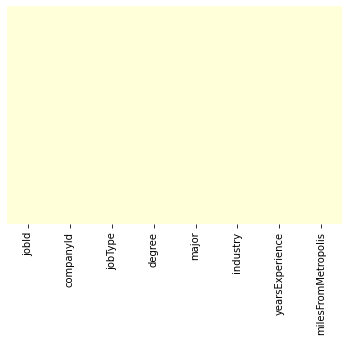

In [12]:
# examine any missing data for train_features_df
print(train_features_df.isnull().sum())
sns.heatmap(train_features_df.isnull(), yticklabels=False, cbar=False,cmap="YlGnBu")


jobId     0
salary    0
dtype: int64


<AxesSubplot:>

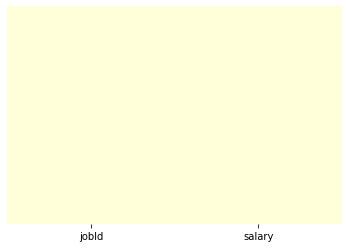

In [13]:
# examine any missing data for train_features_df
print(train_salaries_df.isnull().sum())
sns.heatmap(train_salaries_df.isnull(), yticklabels=False, cbar=False,cmap="YlGnBu")


jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64


<AxesSubplot:>

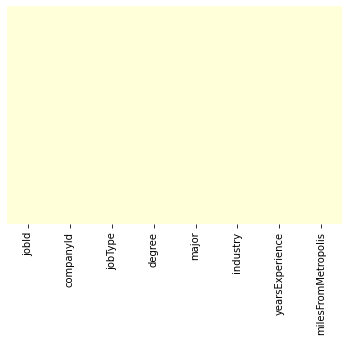

In [14]:
# examine any missing data for test_features_df
print(test_features_df.isnull().sum())
sns.heatmap(test_features_df.isnull(), yticklabels=False, cbar=False,cmap="YlGnBu")


<h3> Checking for Duplicates </h3>

In [16]:
train_features_df.duplicated()
# compute the number of duplicated rows
print(train_features_df.duplicated().sum())

0


In [17]:
train_salaries_df.duplicated()
# compute the number of duplicated rows
print(train_salaries_df.duplicated().sum())

0


In [18]:
test_features_df.duplicated()
# compute the number of duplicated rows
print(test_features_df.duplicated().sum())

0


<h3> Outliers </h3>

In [19]:
train_features_df.describe()

yearsExperience  milesFromMetropolis
count   1000000.000000       1000000.000000
mean         11.992386            49.529260
std           7.212391            28.877733
min           0.000000             0.000000
25%           6.000000            25.000000
50%          12.000000            50.000000
75%          18.000000            75.000000
max          24.000000            99.000000

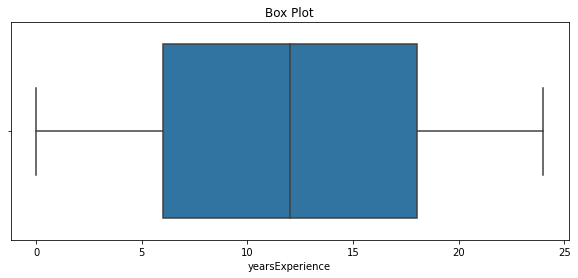

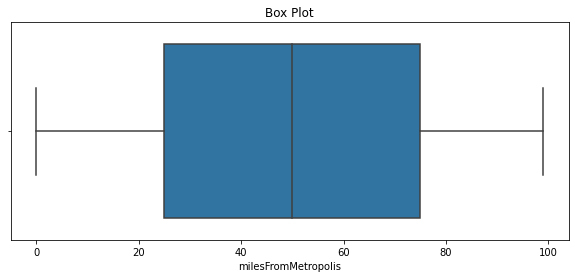

In [20]:
# box plots for our train_features_df to visualize our dataset
def box_plots(df):
    plt.figure(figsize=(10,4))
    plt.title('Box Plot')
    sns.boxplot(x=df)
    plt.show()
box_plots(train_features_df['yearsExperience'])
box_plots(train_features_df['milesFromMetropolis'])

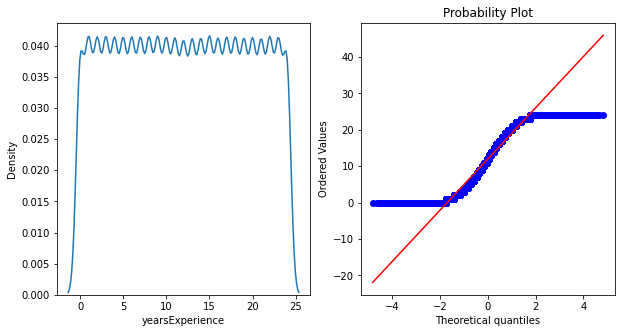

In [21]:
#function to return plots for the feature to see normal distribution
def normality(data,feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.kdeplot(data[feature])
    plt.subplot(1,2,2)
    stats.probplot(data[feature],plot=pylab)
    plt.show()
    
normality(train_features_df,'yearsExperience') 

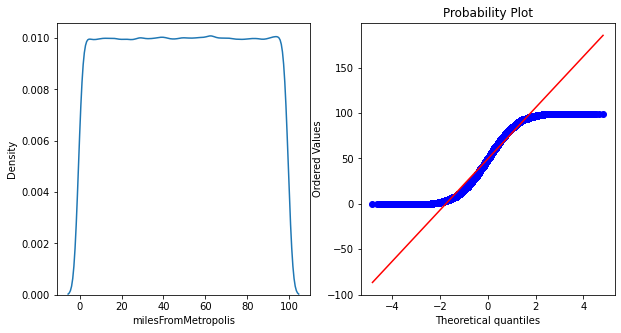

In [22]:
#function to return plots for the feature to see normal distribution
def normality(data,feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.kdeplot(data[feature])
    plt.subplot(1,2,2)
    stats.probplot(data[feature],plot=pylab)
    plt.show()
    
normality(train_features_df,'milesFromMetropolis') 

In [23]:
train_salaries_df.describe()

salary
count  1000000.000000
mean       116.061818
std         38.717936
min          0.000000
25%         88.000000
50%        114.000000
75%        141.000000
max        301.000000

/Users/munjismac/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


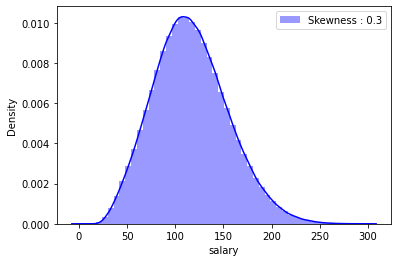

In [24]:
# plotting the skewness of our salary dataset
plot1 = sns.distplot(train_salaries_df["salary"], color="b", label="Skewness : %.1f"%(train_salaries_df["salary"].skew()))
plot1 = plot1.legend(loc="best")

<p>NOTE: The skewness does not tell us about the number of outliers. It only tells us the direction. </P>

<AxesSubplot:xlabel='salary', ylabel='Count'>

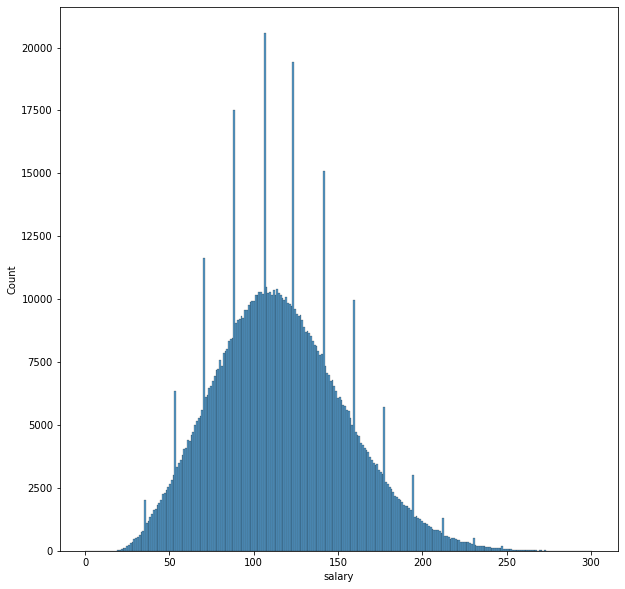

In [25]:
# counting the number of observations that fall within disrete bins.
plt.figure(figsize=(10,10))
sns.histplot(data=train_salaries_df, x="salary")

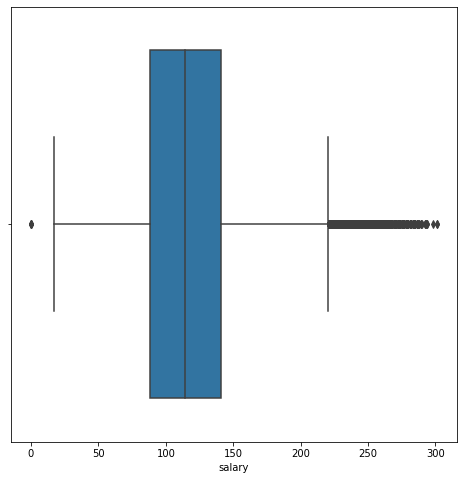

In [26]:
plt.figure(figsize=(8,8))
ax = sns.boxplot(x=train_salaries_df["salary"])

In [27]:
print(train_salaries_df['salary'].min())
# boolean indexing to find columns with salary of 0's
train_salaries_df[train_salaries_df.salary == 0]

0


jobId  salary
30559   JOB1362684438246       0
495984  JOB1362684903671       0
652076  JOB1362685059763       0
816129  JOB1362685223816       0
828156  JOB1362685235843       0

<p> It doesn't make sense to have a salary of $0 </p>

<h3> Dropping Outliers </h3>
<p>If data is evidently false: a employee cannot have a salary of $0 </p>
<p>NOTE: Removing outliers in your dataset is key to getting a cleaner prediction. If you know about how the data was sourced and can verify that those values are incorrect you should remove them.</p>
<p>ASSUMPTION IS WORKERS ARE NOT VOLUNTEERING AND ARE IN FACT WORKING FOR A SALARY.</p>

In [28]:
# merging both dataframes to match with jobId
final_df = pd.merge(left=train_features_df, right=train_salaries_df, left_on='jobId', right_on='jobId')

In [29]:
# examine first 10 lines to ensure they matched correctly
final_df

jobId companyId         jobType       degree      major  \
0       JOB1362684407687    COMP37             CFO      MASTERS       MATH   
1       JOB1362684407688    COMP19             CEO  HIGH_SCHOOL       NONE   
2       JOB1362684407689    COMP52  VICE_PRESIDENT     DOCTORAL    PHYSICS   
3       JOB1362684407690    COMP38         MANAGER     DOCTORAL  CHEMISTRY   
4       JOB1362684407691     COMP7  VICE_PRESIDENT    BACHELORS    PHYSICS   
...                  ...       ...             ...          ...        ...   
999995  JOB1362685407682    COMP56  VICE_PRESIDENT    BACHELORS  CHEMISTRY   
999996  JOB1362685407683    COMP24             CTO  HIGH_SCHOOL       NONE   
999997  JOB1362685407684    COMP23          JUNIOR  HIGH_SCHOOL       NONE   
999998  JOB1362685407685     COMP3             CFO      MASTERS       NONE   
999999  JOB1362685407686    COMP59          JUNIOR    BACHELORS       NONE   

         industry  yearsExperience  milesFromMetropolis  salary  
0          HEALTH               10                   83     130  
1             WEB                3                   73     101  
2          HEALTH               10                   38     137  
3            AUTO                8                   17     142  
4         FINANCE                8                   16     163  
...           ...              ...                  ...     ...  
999995     HEALTH               19                   94      88  
999996    FINANCE               12                   35     160  
999997  EDUCATION               16                   81      64  
999998     HEALTH                6                    5     149  
999999  EDUCATION               20                   11      88  

[1000000 rows x 9 columns]

In [30]:
# find all rows with 0 salaries
false_observations = final_df[final_df.salary == 0]
false_observations

jobId companyId         jobType       degree        major  \
30559   JOB1362684438246    COMP44          JUNIOR     DOCTORAL         MATH   
495984  JOB1362684903671    COMP34          JUNIOR         NONE         NONE   
652076  JOB1362685059763    COMP25             CTO  HIGH_SCHOOL         NONE   
816129  JOB1362685223816    COMP42         MANAGER     DOCTORAL  ENGINEERING   
828156  JOB1362685235843    COMP40  VICE_PRESIDENT      MASTERS  ENGINEERING   

       industry  yearsExperience  milesFromMetropolis  salary  
30559      AUTO               11                    7       0  
495984      OIL                1                   25       0  
652076     AUTO                6                   60       0  
816129  FINANCE               18                    6       0  
828156      WEB                3                   29       0

In [31]:
# grab the indexes to later drop
index_false_observations = false_observations.index[false_observations['salary'] == 0].tolist()
index_false_observations

[30559, 495984, 652076, 816129, 828156]

In [32]:
# Drop rows
final_df = final_df.drop(index_false_observations).reset_index(drop=True) 

In [33]:
# check to see if it worked and no 0's are displayed
final_df[final_df.salary == 0]

Empty DataFrame
Columns: [jobId, companyId, jobType, degree, major, industry, yearsExperience, milesFromMetropolis, salary]
Index: []

In [34]:
# we see it dropped the 5 rows as well.
final_df.shape

(999995, 9)

<p> Dealing with degrees awarded but no major declared? </p>

<h3>ASSUMPTION: Is NONE means dropped out of High School, not missing data. As stats show the world has 10% High School Dropout Rate </h3>


<p>https://www.statista.com/topics/7785/education-worldwide/ </p>

In [50]:
print(final_df['major'].value_counts())
print(final_df['degree'].value_counts())

NONE           532353
CHEMISTRY       58875
LITERATURE      58684
ENGINEERING     58594
BUSINESS        58518
PHYSICS         58410
COMPSCI         58382
BIOLOGY         58379
MATH            57800
Name: major, dtype: int64
HIGH_SCHOOL    236975
NONE           236853
BACHELORS      175495
DOCTORAL       175362
MASTERS        175310
Name: degree, dtype: int64


<b>Fix the issues of in degree awarded but major being 'None'</b>

In [64]:
# Fix the issues of in degree awarded but major being 'None'
degree_no_major = final_df[(final_df.major == "NONE") & (final_df.degree != 'HIGH_SCHOOL') & (final_df.degree != 'NONE')]
degree_no_major

jobId companyId         jobType     degree major  \
24      JOB1362684407711    COMP20             CEO  BACHELORS  NONE   
32      JOB1362684407719     COMP1             CEO    MASTERS  NONE   
34      JOB1362684407721    COMP31         MANAGER   DOCTORAL  NONE   
40      JOB1362684407727     COMP7  VICE_PRESIDENT    MASTERS  NONE   
46      JOB1362684407733    COMP53         MANAGER   DOCTORAL  NONE   
...                  ...       ...             ...        ...   ...   
999953  JOB1362685407645    COMP46          JUNIOR  BACHELORS  NONE   
999964  JOB1362685407656    COMP37          JUNIOR   DOCTORAL  NONE   
999982  JOB1362685407674    COMP51             CFO    MASTERS  NONE   
999993  JOB1362685407685     COMP3             CFO    MASTERS  NONE   
999994  JOB1362685407686    COMP59          JUNIOR  BACHELORS  NONE   

         industry  yearsExperience  milesFromMetropolis  salary  
24            WEB               12                    8     202  
32            OIL                7                   91     165  
34         HEALTH               15                   14     164  
40         HEALTH                8                   54     141  
46           AUTO               19                   22     116  
...           ...              ...                  ...     ...  
999953    SERVICE               24                   64      79  
999964  EDUCATION               21                   31     131  
999982    FINANCE                1                   99     124  
999993     HEALTH                6                    5     149  
999994  EDUCATION               20                   11      88  

[58525 rows x 9 columns]

In [65]:
degree_no_major['major'] = 'CHEMISTRY'

/var/folders/m3/fzmpbzjs1tjcq9gdml2487w40000gn/T/ipykernel_47684/1804983196.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  degree_no_major['major'] = 'CHEMISTRY'


In [66]:
degree_no_major

jobId companyId         jobType     degree      major  \
24      JOB1362684407711    COMP20             CEO  BACHELORS  CHEMISTRY   
32      JOB1362684407719     COMP1             CEO    MASTERS  CHEMISTRY   
34      JOB1362684407721    COMP31         MANAGER   DOCTORAL  CHEMISTRY   
40      JOB1362684407727     COMP7  VICE_PRESIDENT    MASTERS  CHEMISTRY   
46      JOB1362684407733    COMP53         MANAGER   DOCTORAL  CHEMISTRY   
...                  ...       ...             ...        ...        ...   
999953  JOB1362685407645    COMP46          JUNIOR  BACHELORS  CHEMISTRY   
999964  JOB1362685407656    COMP37          JUNIOR   DOCTORAL  CHEMISTRY   
999982  JOB1362685407674    COMP51             CFO    MASTERS  CHEMISTRY   
999993  JOB1362685407685     COMP3             CFO    MASTERS  CHEMISTRY   
999994  JOB1362685407686    COMP59          JUNIOR  BACHELORS  CHEMISTRY   

         industry  yearsExperience  milesFromMetropolis  salary  
24            WEB               12                    8     202  
32            OIL                7                   91     165  
34         HEALTH               15                   14     164  
40         HEALTH                8                   54     141  
46           AUTO               19                   22     116  
...           ...              ...                  ...     ...  
999953    SERVICE               24                   64      79  
999964  EDUCATION               21                   31     131  
999982    FINANCE                1                   99     124  
999993     HEALTH                6                    5     149  
999994  EDUCATION               20                   11      88  

[58525 rows x 9 columns]

In [67]:
"""Merging dataframe with degrees that have been awarded but no majors declared and fixing them to be 
updated with most frequent majors (Chemistry was 2nd as NONE was 1st). Excluding High School. Think of this as
simple imputing the NONE columns with 2nd most frequent
"""
final_df = pd.concat([final_df[~final_df.jobId.isin(degree_no_major.jobId)], degree_no_major], ignore_index=True)


<h3> Data Visualization </h3>


/var/folders/m3/fzmpbzjs1tjcq9gdml2487w40000gn/T/ipykernel_47684/3966153857.py:15: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  bx.figure.savefig('Salary_scatterplot.png', bbox_inches='tight')
/Users/munjismac/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


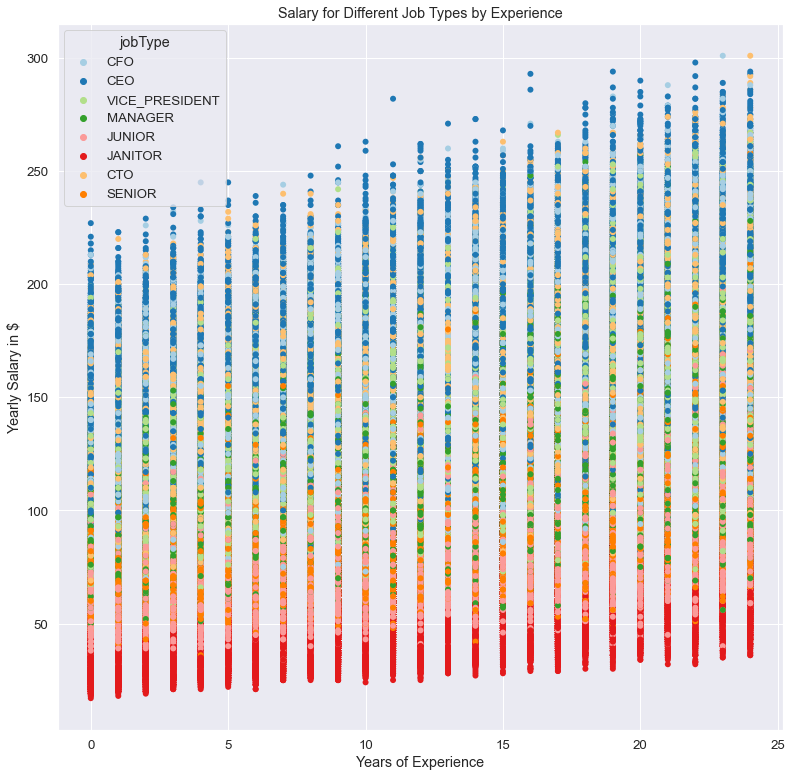

In [69]:
# fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
plt.figure(figsize=(13,13))
sns.set(font_scale = 1.2)

bx = sns.scatterplot(x='yearsExperience', y="salary",
            hue="jobType", 
            palette="Paired",
#             sizes=(10, 200), 
            linewidth=0,
            data=final_df)

bx.set_title("Salary for Different Job Types by Experience")
bx.set_xlabel('Years of Experience')
bx.set_ylabel('Yearly Salary in $')
bx.figure.savefig('Salary_scatterplot.png', bbox_inches='tight')

In [70]:
# more data deep diving to understand the unique values we have in the jobType column
janitors = final_df[final_df.jobType == 'JANITOR']
print(final_df['jobType'].nunique())
print(final_df['jobType'].value_counts())
print('-----------------------------------')
print(janitors.max()) # the max salary for this janitor is 189k... after googling I learned one bay area janitor made $276k one year.


8
SENIOR            125886
VICE_PRESIDENT    125234
MANAGER           125120
CTO               125045
JANITOR           124971
CEO               124778
JUNIOR            124592
CFO               124369
Name: jobType, dtype: int64
-----------------------------------
jobId                  JOB1362685407677
companyId                         COMP9
jobType                         JANITOR
degree                             NONE
major                              NONE
industry                            WEB
yearsExperience                      24
milesFromMetropolis                  99
salary                              189
dtype: object


/var/folders/m3/fzmpbzjs1tjcq9gdml2487w40000gn/T/ipykernel_47684/508374504.py:15: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  bx.figure.savefig('miles_from_metro_plot.png', bbox_inches='tight')
/Users/munjismac/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


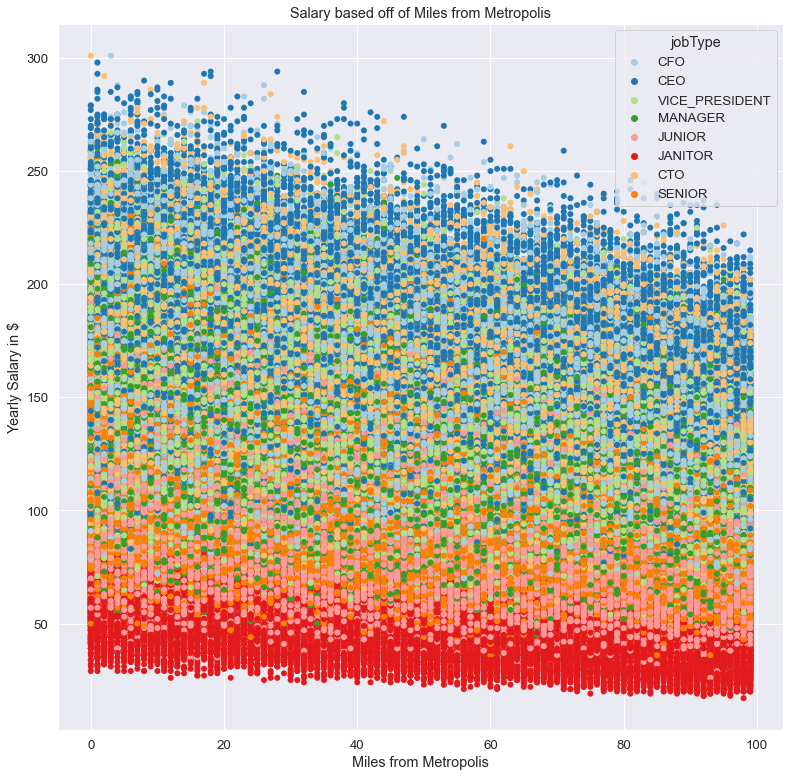

In [71]:
# fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
plt.figure(figsize=(13,13))
sns.set(font_scale = 1.2)

bx = sns.scatterplot(x='milesFromMetropolis', y="salary",
            hue="jobType", 
            palette="Paired",
#             sizes=(10, 200), 
            linewidth=0,
            data=final_df)

bx.set_title("Salary based off of Miles from Metropolis")
bx.set_xlabel('Miles from Metropolis')
bx.set_ylabel('Yearly Salary in $')
bx.figure.savefig('miles_from_metro_plot.png', bbox_inches='tight')

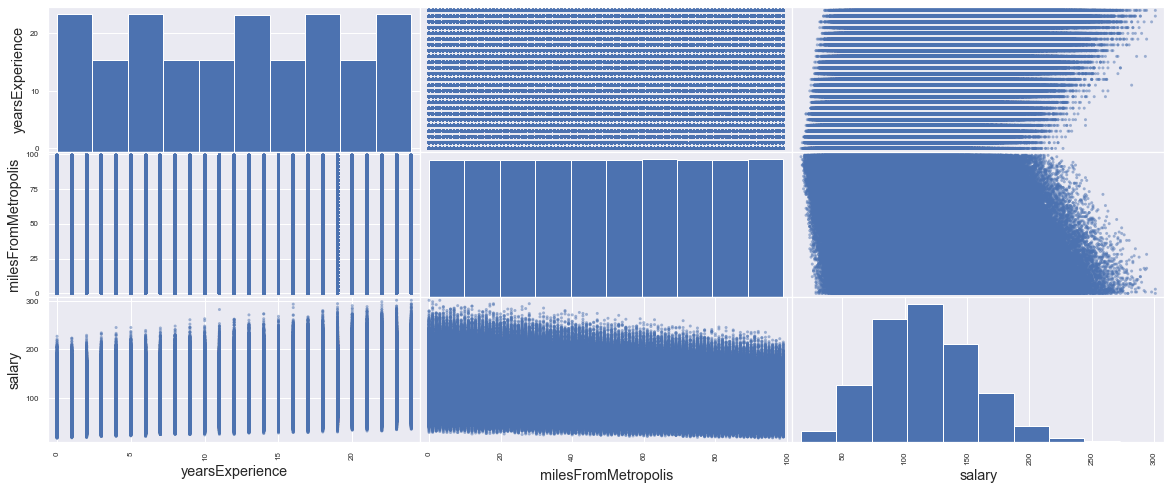

In [72]:
from pandas.plotting import scatter_matrix
scatter_matrix(final_df,figsize=(20,8))
plt.show()

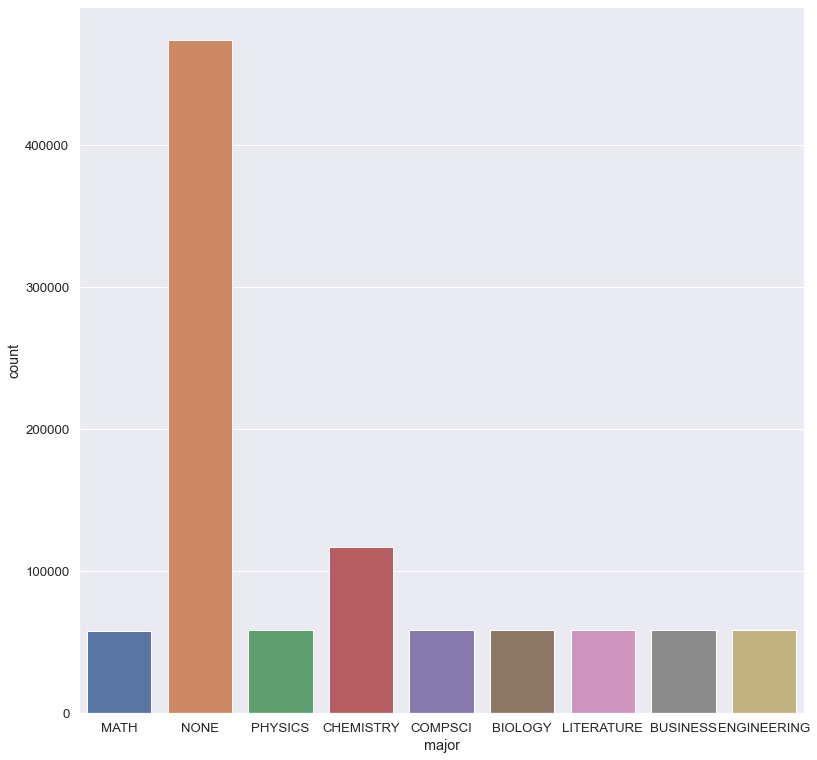

In [78]:
# fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
plt.figure(figsize=(13,13))
sns.set(font_scale = 1.2)

# cx.set_title("Salary for Differenet Degrees")
# cx.set_xlabel('Degree Awarded')
# cx.set_ylabel('Yearly Salary in $')
# cx.figure.savefig('salary_for_degree_scatterplot.png', bbox_inches='tight')


ax = sns.countplot(x="major", data=final_df)



Text(0, 0.5, 'Yearly Salary in $')

/Users/munjismac/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


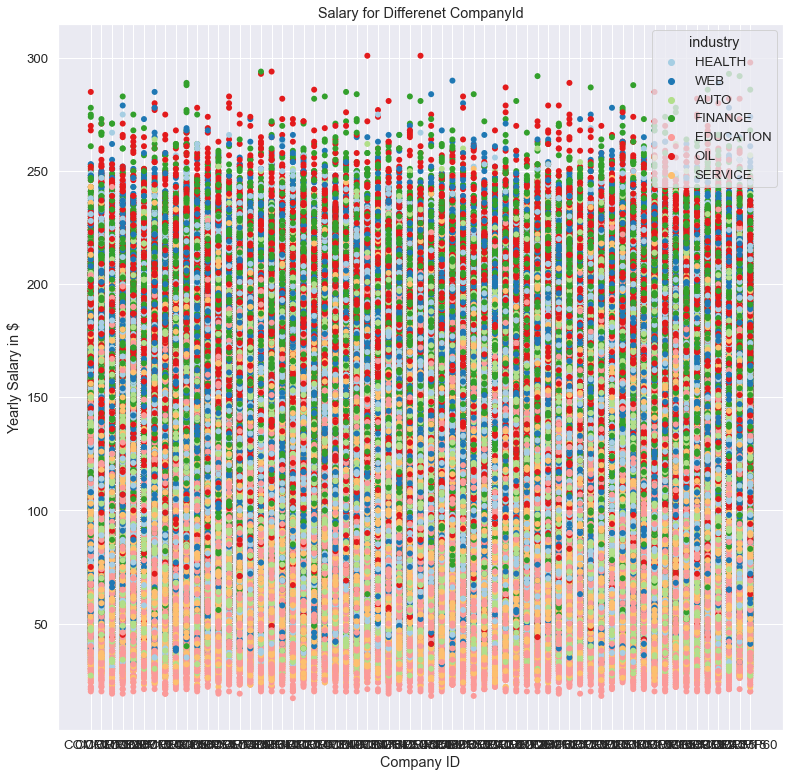

In [75]:
# fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
plt.figure(figsize=(13,13))
sns.set(font_scale = 1.2)

cx = sns.scatterplot(x='companyId', y="salary",
            hue="industry", 
            palette="Paired",
#             sizes=(10, 200), 
            linewidth=0,
            data=final_df)

cx.set_title("Salary for Differenet CompanyId")
cx.set_xlabel('Company ID')
cx.set_ylabel('Yearly Salary in $')
# cx.figure.savefig('salary_for_degree_scatterplot.png', bbox_inches='tight')

/var/folders/m3/fzmpbzjs1tjcq9gdml2487w40000gn/T/ipykernel_47684/3640962444.py:15: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  dx.figure.savefig('salary_for_JobType_scatterplot.png', bbox_inches='tight')
/Users/munjismac/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


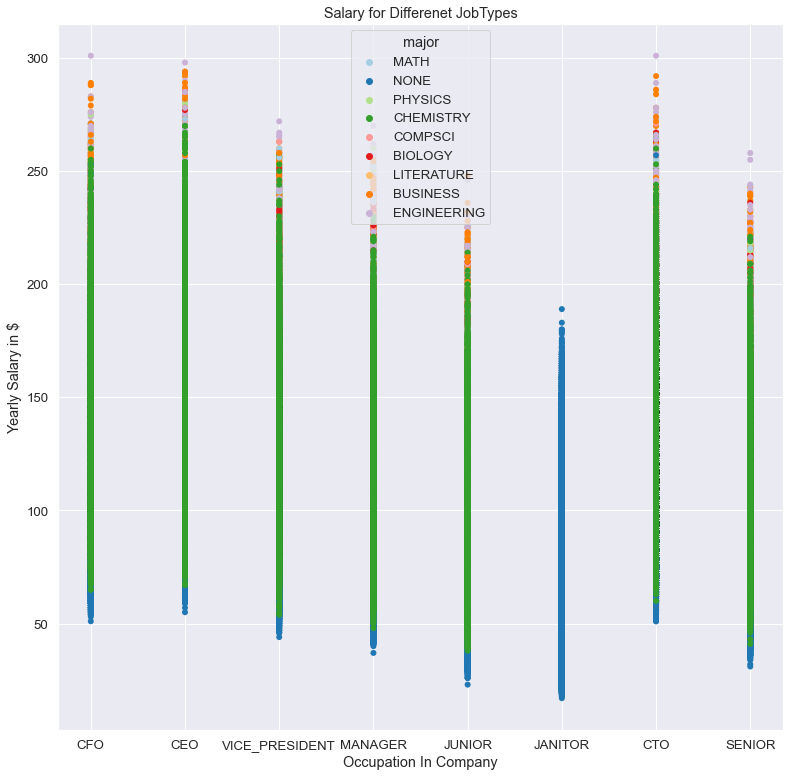

In [79]:
# fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
plt.figure(figsize=(13,13))
sns.set(font_scale = 1.2)

dx = sns.scatterplot(x='jobType', y="salary",
                     hue='major',
            palette="Paired",
#             sizes=(10, 200), 
            linewidth=0,
            data=final_df)

dx.set_title("Salary for Differenet JobTypes")
dx.set_xlabel('Occupation In Company')
dx.set_ylabel('Yearly Salary in $')
dx.figure.savefig('salary_for_JobType_scatterplot.png', bbox_inches='tight')

<h2> Feature Engineering OHE and Scaling</h2>

<p>Steps we will take to smoothly transition our categorical features into numeical with One Hot Encoding </p>
<p><b>NOTES:</b> </p>

<p>We will add 63 new columns and see how our model will perform once we get there... if we see over-fitting we'll drop this column since there could be correlation with industry - we could just focus on this since companies are typically sorted w/ sectors. Who knows yet, lets test this.</p>

<p>1.) We need to normalize our numerical features, let's try min-max scaling which ensures a fixed range and efficient regardless of distribution</p>
<p>2.) Then one hot encode the companyId - categorization+OHE </p>
<p>3.) Will continue to encode our jobType and degree (Ordinal Encoding)</p>
<p>4.) Correlation Matrix</p>

<p><b> Copying anything we do for the Testing process!!!!!!!!!!</b></p>

In [81]:
# analylze unique features
final_df.nunique()

jobId                  999995
companyId                  63
jobType                     8
degree                      5
major                       9
industry                    7
yearsExperience            25
milesFromMetropolis       100
salary                    279
dtype: int64

In [82]:
# examining unique variables for categorical features
feat_categorical_nunique = final_df.select_dtypes(include='object').nunique()
# understanding how many columns we're going to have to account for before OHE.
feat_categorical_nunique.sum() - 999995 #will drop the jobID

92

In [83]:
# examining unique variables for numerical features 
feat_numerical_nunique = final_df.select_dtypes(include='int64').nunique()
feat_numerical_nunique

yearsExperience         25
milesFromMetropolis    100
salary                 279
dtype: int64

In [84]:
final_df.companyId.value_counts().sort_values(ascending=False)

COMP39    16193
COMP35    16114
COMP59    16066
COMP30    16041
COMP3     16028
          ...  
COMP17    15715
COMP0     15666
COMP2     15641
COMP8     15638
COMP57    15635
Name: companyId, Length: 63, dtype: int64

<h3> Scaling </h3>

In [85]:
# normalizing both features of yearsExperience and milesFromMetroplis
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler() # instantiate
minmax_scaler.fit(final_df[['yearsExperience']]) # Fit scaler to data
final_df['yearsExperience'] = minmax_scaler.transform(final_df[['yearsExperience']]) #use scaler to transform data

In [86]:
# scale milesFromMetropolis
minmax_scaler.fit(final_df[['milesFromMetropolis']])
final_df['milesFromMetropolis'] = minmax_scaler.transform(final_df[['milesFromMetropolis']])


In [87]:
# peak into new scaling columns
final_df.head(5)

jobId companyId         jobType       degree      major  \
0  JOB1362684407687    COMP37             CFO      MASTERS       MATH   
1  JOB1362684407688    COMP19             CEO  HIGH_SCHOOL       NONE   
2  JOB1362684407689    COMP52  VICE_PRESIDENT     DOCTORAL    PHYSICS   
3  JOB1362684407690    COMP38         MANAGER     DOCTORAL  CHEMISTRY   
4  JOB1362684407691     COMP7  VICE_PRESIDENT    BACHELORS    PHYSICS   

  industry  yearsExperience  milesFromMetropolis  salary  
0   HEALTH         0.416667             0.838384     130  
1      WEB         0.125000             0.737374     101  
2   HEALTH         0.416667             0.383838     137  
3     AUTO         0.333333             0.171717     142  
4  FINANCE         0.333333             0.161616     163

<h3> OHE our columns </h3>

In [88]:
from sklearn.preprocessing import OneHotEncoder

# one hot encode companyId
ohe = OneHotEncoder(sparse=False)
companyId_ohe = ohe.fit_transform(final_df[['companyId']])

In [89]:
print(ohe.categories_) # Check the column order returned by the transformation


[array(['COMP0', 'COMP1', 'COMP10', 'COMP11', 'COMP12', 'COMP13', 'COMP14',
       'COMP15', 'COMP16', 'COMP17', 'COMP18', 'COMP19', 'COMP2',
       'COMP20', 'COMP21', 'COMP22', 'COMP23', 'COMP24', 'COMP25',
       'COMP26', 'COMP27', 'COMP28', 'COMP29', 'COMP3', 'COMP30',
       'COMP31', 'COMP32', 'COMP33', 'COMP34', 'COMP35', 'COMP36',
       'COMP37', 'COMP38', 'COMP39', 'COMP4', 'COMP40', 'COMP41',
       'COMP42', 'COMP43', 'COMP44', 'COMP45', 'COMP46', 'COMP47',
       'COMP48', 'COMP49', 'COMP5', 'COMP50', 'COMP51', 'COMP52',
       'COMP53', 'COMP54', 'COMP55', 'COMP56', 'COMP57', 'COMP58',
       'COMP59', 'COMP6', 'COMP60', 'COMP61', 'COMP62', 'COMP7', 'COMP8',
       'COMP9'], dtype=object)]


In [90]:
final_df['COMP0'],final_df['COMP1'],final_df['COMP10'],final_df['COMP11'],final_df['COMP12'],final_df['COMP13'],final_df['COMP14'],final_df['COMP15'],final_df['COMP16'],final_df['COMP17'], final_df['COMP18'],final_df['COMP19'],final_df['COMP2'],final_df['COMP20'],final_df['COMP21'],final_df['COMP22'],final_df['COMP23'],final_df['COMP24'],final_df['COMP25'],final_df['COMP26'],final_df['COMP27'],final_df['COMP28'],final_df['COMP29'],final_df['COMP3'],final_df['COMP30'],final_df['COMP31'],final_df['COMP32'],final_df['COMP33'],final_df['COMP34'],final_df['COMP35'],final_df['COMP36'],final_df['COMP37'],final_df['COMP38'],final_df['COMP39'],final_df['COMP4'],final_df['COMP40'],final_df['COMP41'],final_df['COMP42'],final_df['COMP43'],final_df['COMP44'],final_df['COMP45'],final_df['COMP46'],final_df['COMP47'],final_df['COMP48'],final_df['COMP49'],final_df['COMP5'],final_df['COMP50'],final_df['COMP51'],final_df['COMP52'],final_df['COMP53'],final_df['COMP54'],final_df['COMP55'],final_df['COMP56'],final_df['COMP57'],final_df['COMP58'],final_df['COMP59'],final_df['COMP6'],final_df['COMP60'],final_df['COMP61'],final_df['COMP62'],final_df['COMP7'],final_df['COMP8'],final_df['COMP9'] = companyId_ohe.T


In [91]:
final_df.drop(columns='companyId', inplace=True)

In [92]:
# OHE major column
major_ohe = ohe.fit_transform(final_df[['major']])


In [93]:
ohe.categories_  # Check the column order returned by the transformation

[array(['BIOLOGY', 'BUSINESS', 'CHEMISTRY', 'COMPSCI', 'ENGINEERING',
        'LITERATURE', 'MATH', 'NONE', 'PHYSICS'], dtype=object)]

In [94]:
final_df['BIOLOGY'],final_df['BUSINESS'], final_df['CHEMISTRY'], final_df['COMPSCI'], final_df['ENGINEERING'], final_df['LITERATURE'], final_df['MATH'],final_df['NONE'], final_df['PHYSICS'] = major_ohe.T



In [95]:
final_df.drop(columns='major', inplace=True)

In [96]:
# OHE indsutry
industry_ohe = ohe.fit_transform(final_df[['industry']])
print(ohe.categories_)

[array(['AUTO', 'EDUCATION', 'FINANCE', 'HEALTH', 'OIL', 'SERVICE', 'WEB'],
      dtype=object)]


In [97]:
final_df['AUTO'],final_df['EDUCATION'], final_df['FINANCE'], final_df['HEALTH'], final_df['OIL'], final_df['SERVICE'],final_df['WEB'] = industry_ohe.T




In [98]:
final_df.drop(columns='industry', inplace=True)

In [99]:
jobType_ohe = ohe.fit_transform(final_df[['jobType']])
print(ohe.categories_)

[array(['CEO', 'CFO', 'CTO', 'JANITOR', 'JUNIOR', 'MANAGER', 'SENIOR',
       'VICE_PRESIDENT'], dtype=object)]


In [100]:
final_df['CEO'],final_df['CFO'], final_df['CTO'], final_df['JANITOR'], final_df['JUNIOR'], final_df['MANAGER'],final_df['SENIOR'],final_df['VICE_PRESIDENT'] = jobType_ohe.T



In [101]:
final_df.drop(columns='jobType', inplace=True)

In [102]:
final_df


jobId       degree  yearsExperience  milesFromMetropolis  \
0       JOB1362684407687      MASTERS         0.416667             0.838384   
1       JOB1362684407688  HIGH_SCHOOL         0.125000             0.737374   
2       JOB1362684407689     DOCTORAL         0.416667             0.383838   
3       JOB1362684407690     DOCTORAL         0.333333             0.171717   
4       JOB1362684407691    BACHELORS         0.333333             0.161616   
...                  ...          ...              ...                  ...   
999990  JOB1362685407645    BACHELORS         1.000000             0.646465   
999991  JOB1362685407656     DOCTORAL         0.875000             0.313131   
999992  JOB1362685407674      MASTERS         0.041667             1.000000   
999993  JOB1362685407685      MASTERS         0.250000             0.050505   
999994  JOB1362685407686    BACHELORS         0.833333             0.111111   

        salary  COMP0  COMP1  COMP10  COMP11  COMP12  ...  SERVICE  WEB  CEO  \
0          130    0.0    0.0     0.0     0.0     0.0  ...      0.0  0.0  0.0   
1          101    0.0    0.0     0.0     0.0     0.0  ...      0.0  1.0  1.0   
2          137    0.0    0.0     0.0     0.0     0.0  ...      0.0  0.0  0.0   
3          142    0.0    0.0     0.0     0.0     0.0  ...      0.0  0.0  0.0   
4          163    0.0    0.0     0.0     0.0     0.0  ...      0.0  0.0  0.0   
...        ...    ...    ...     ...     ...     ...  ...      ...  ...  ...   
999990      79    0.0    0.0     0.0     0.0     0.0  ...      1.0  0.0  0.0   
999991     131    0.0    0.0     0.0     0.0     0.0  ...      0.0  0.0  0.0   
999992     124    0.0    0.0     0.0     0.0     0.0  ...      0.0  0.0  0.0   
999993     149    0.0    0.0     0.0     0.0     0.0  ...      0.0  0.0  0.0   
999994      88    0.0    0.0     0.0     0.0     0.0  ...      0.0  0.0  0.0   

        CFO  CTO  JANITOR  JUNIOR  MANAGER  SENIOR  VICE_PRESIDENT  
0       1.0  0.0      0.0     0.0      0.0     0.0             0.0  
1       0.0  0.0      0.0     0.0      0.0     0.0             0.0  
2       0.0  0.0      0.0     0.0      0.0     0.0             1.0  
3       0.0  0.0      0.0     0.0      1.0     0.0             0.0  
4       0.0  0.0      0.0     0.0      0.0     0.0             1.0  
...     ...  ...      ...     ...      ...     ...             ...  
999990  0.0  0.0      0.0     1.0      0.0     0.0             0.0  
999991  0.0  0.0      0.0     1.0      0.0     0.0             0.0  
999992  1.0  0.0      0.0     0.0      0.0     0.0             0.0  
999993  1.0  0.0      0.0     0.0      0.0     0.0             0.0  
999994  0.0  0.0      0.0     1.0      0.0     0.0             0.0  

[999995 rows x 92 columns]

<h3> Ordinal Encoding </h3>

In [103]:
# Degree is an ordinal feature and must be manually encoded
print(final_df['degree'].nunique())
print(final_df['degree'].unique())

final_df['degree'] = final_df['degree'].map({
    'NONE' : 0,
    'HIGH_SCHOOL': 1,
    'BACHELORS' : 2,
    'MASTERS' : 3,
    'DOCTORAL' : 4
})

5
['MASTERS' 'HIGH_SCHOOL' 'DOCTORAL' 'BACHELORS' 'NONE']


In [104]:
final_df.drop(columns='jobId')

degree  yearsExperience  milesFromMetropolis  salary  COMP0  COMP1  \
0            3         0.416667             0.838384     130    0.0    0.0   
1            1         0.125000             0.737374     101    0.0    0.0   
2            4         0.416667             0.383838     137    0.0    0.0   
3            4         0.333333             0.171717     142    0.0    0.0   
4            2         0.333333             0.161616     163    0.0    0.0   
...        ...              ...                  ...     ...    ...    ...   
999990       2         1.000000             0.646465      79    0.0    0.0   
999991       4         0.875000             0.313131     131    0.0    0.0   
999992       3         0.041667             1.000000     124    0.0    0.0   
999993       3         0.250000             0.050505     149    0.0    0.0   
999994       2         0.833333             0.111111      88    0.0    0.0   

        COMP10  COMP11  COMP12  COMP13  ...  SERVICE  WEB  CEO  CFO  CTO  \
0          0.0     0.0     0.0     0.0  ...      0.0  0.0  0.0  1.0  0.0   
1          0.0     0.0     0.0     0.0  ...      0.0  1.0  1.0  0.0  0.0   
2          0.0     0.0     0.0     0.0  ...      0.0  0.0  0.0  0.0  0.0   
3          0.0     0.0     0.0     0.0  ...      0.0  0.0  0.0  0.0  0.0   
4          0.0     0.0     0.0     0.0  ...      0.0  0.0  0.0  0.0  0.0   
...        ...     ...     ...     ...  ...      ...  ...  ...  ...  ...   
999990     0.0     0.0     0.0     0.0  ...      1.0  0.0  0.0  0.0  0.0   
999991     0.0     0.0     0.0     0.0  ...      0.0  0.0  0.0  0.0  0.0   
999992     0.0     0.0     0.0     0.0  ...      0.0  0.0  0.0  1.0  0.0   
999993     0.0     0.0     0.0     0.0  ...      0.0  0.0  0.0  1.0  0.0   
999994     0.0     0.0     0.0     0.0  ...      0.0  0.0  0.0  0.0  0.0   

        JANITOR  JUNIOR  MANAGER  SENIOR  VICE_PRESIDENT  
0           0.0     0.0      0.0     0.0             0.0  
1           0.0     0.0      0.0     0.0             0.0  
2           0.0     0.0      0.0     0.0             1.0  
3           0.0     0.0      1.0     0.0             0.0  
4           0.0     0.0      0.0     0.0             1.0  
...         ...     ...      ...     ...             ...  
999990      0.0     1.0      0.0     0.0             0.0  
999991      0.0     1.0      0.0     0.0             0.0  
999992      0.0     0.0      0.0     0.0             0.0  
999993      0.0     0.0      0.0     0.0             0.0  
999994      0.0     1.0      0.0     0.0             0.0  

[999995 rows x 91 columns]

<h3> Correlation Matrix </h3>


<p>The r value is a number between -1 and 1. It tells us whether two columns are positively correlated, not correlated, or negatively correlated. The closer to 1, the stronger the positive correlation. The closer to -1, the stronger the negative correlation (i.e., the more “opposite” the columns are). The closer to 0, the weaker the correlation. </p>

<AxesSubplot:>

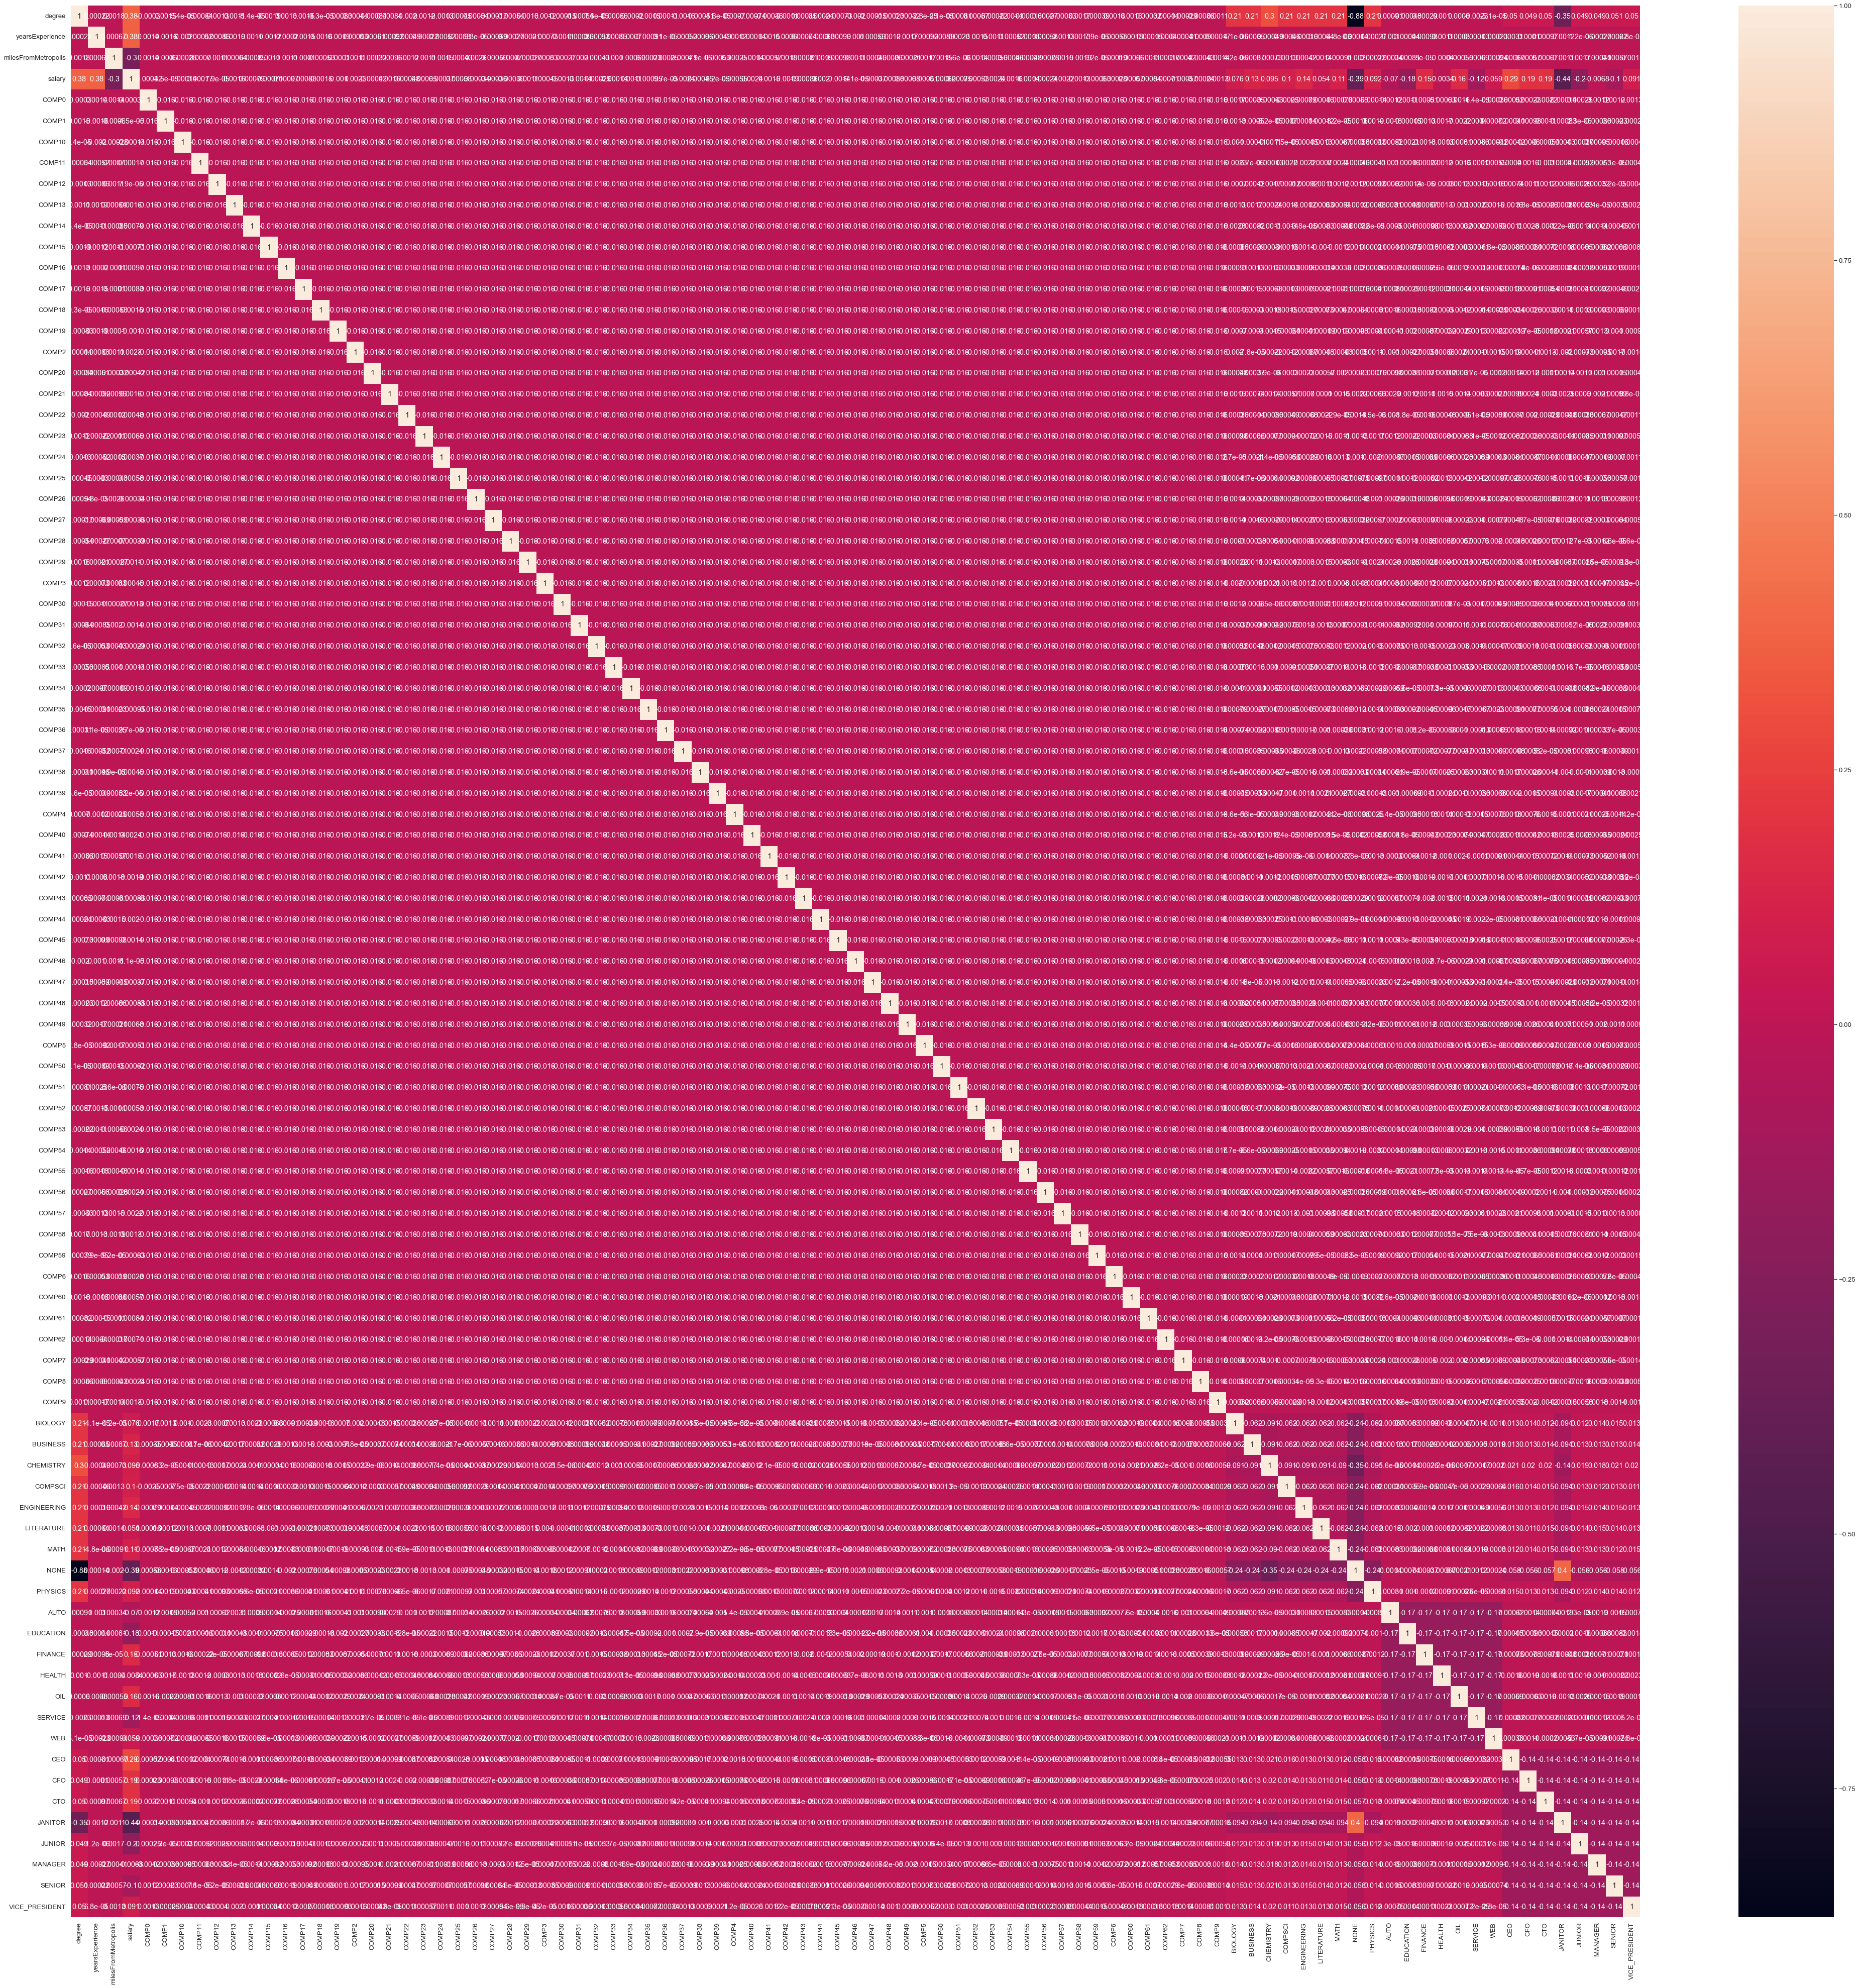

In [105]:
# Correlation Matrix
# the point of correlation matrix is to see which features are causing possible overfitting
# Measures the strength of a relationship between two variables and ranges from -1 to 1

# correlation 
corr = final_df.corr()
top_corr_feat = corr.index
plt.figure(figsize=(70,70))

sns.heatmap(final_df[top_corr_feat].corr(), annot=True)

In [110]:
corr_df = corr.unstack().reset_index() # Unstack correlation matrix 

corr_df.columns = ['feature_1','feature_2', 'correlation'] # rename columns

corr_df.sort_values(by="correlation",ascending=False, inplace=True) # sort by correlation

corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']] # Remove self correlation

corr_df

feature_1        feature_2  correlation
6820      NONE          JANITOR     0.398241
7900   JANITOR             NONE     0.398241
3       degree           salary     0.384044
273     salary           degree     0.384044
274     salary  yearsExperience     0.375013
...        ...              ...          ...
6737      NONE           salary    -0.392479
7829   JANITOR           salary    -0.441676
359     salary          JANITOR    -0.441676
74      degree             NONE    -0.876627
6734      NONE           degree    -0.876627

[8190 rows x 3 columns]

In [109]:
corr_df[(corr_df['correlation'] >= 0.5) | (corr_df['correlation'] <= -0.5)] #finding strong correlations mag > 0.5

feature_1 feature_2  correlation
74      degree      NONE    -0.876627
6734      NONE    degree    -0.876627

<h2>Building the ML Model </h2>

<p>Build a basic model with no features dropped. </p>
<p>👇 Cross validate a Linear regression model. </p>
<p> Will work with different models as we move forward and reiterate feature engineering </p>

In [111]:
final_df = final_df.drop(columns='jobId')

In [112]:
# splitting our data for target and features
X = final_df.drop(columns=['salary'])
y = final_df['salary']

<h3> Baseline Model with Linear Regression </h3>

In [161]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

# instantiate model
model = LinearRegression() 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
cv_score = cross_validate(model,X_train, y_train, cv=5)
cv_score['test_score'].mean()

0.7431044405969088

In [162]:
# fit the model to get the RMSE Score
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [163]:
model.score(X_test, y_test)

0.7418868667239434

In [164]:
# make predictions
y_pred = model.predict(X_test)

<p>Notes: There are three primary metrics used to evaluate linear models. These are: Mean absolute error (MAE), Mean squared error (MSE), or Root mean squared error (RMSE).

MAE: The easiest to understand. Represents average error

MSE: Similar to MAE but noise is exaggerated and larger errors are “punished”. It is harder to interpret than MAE as it’s not in base units, however, it is generally more popular.

RMSE: Most popular metric, similar to MSE, however, the result is square rooted to make it more interpretable as it’s in base units. It is recommended that RMSE be used as the primary metric to interpret your model.

</p>

In [165]:
from sklearn import metrics
# results of MAE
print(metrics.mean_absolute_error(y_test, y_pred))
# print results of MSE
print(metrics.mean_squared_error(y_test, y_pred))
# print results of RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

15.892341752955582
386.5594838629279
19.661116038082067


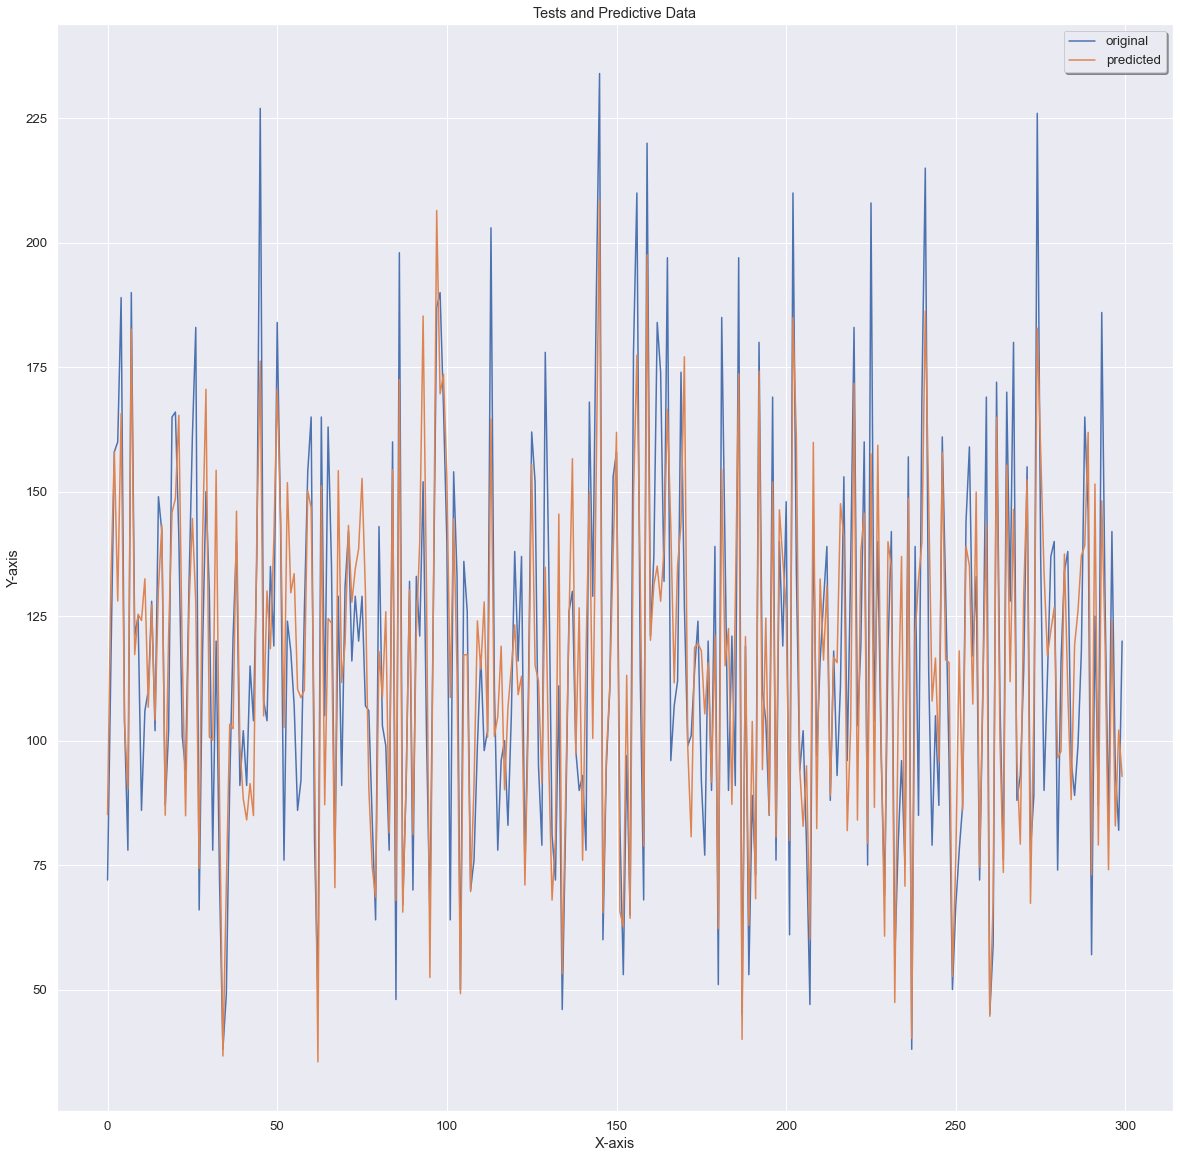

In [166]:
plt.figure(figsize=(20,20))
sns.set(font_scale = 1.2)

x_ax = range(len(y_test[:300]))
plt.plot(x_ax, y_test[:300], label="original")
plt.plot(x_ax, y_pred[:300], label="predicted")
plt.title("Tests and Predictive Data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

<h1>2.2 Models Iteration ♻ </h1>

<p> We will create another model that will drop the companyId column and use multiple model </p>

In [138]:
# drop columns
final_df = final_df.drop(columns=['COMP0', 'COMP1', 'COMP10', 'COMP11', 'COMP12', 'COMP13', 'COMP14',
       'COMP15', 'COMP16', 'COMP17', 'COMP18', 'COMP19', 'COMP2',
       'COMP20', 'COMP21', 'COMP22', 'COMP23', 'COMP24', 'COMP25',
       'COMP26', 'COMP27', 'COMP28', 'COMP29', 'COMP3', 'COMP30',
       'COMP31', 'COMP32', 'COMP33', 'COMP34', 'COMP35', 'COMP36',
       'COMP37', 'COMP38', 'COMP39', 'COMP4', 'COMP40', 'COMP41',
       'COMP42', 'COMP43', 'COMP44', 'COMP45', 'COMP46', 'COMP47',
       'COMP48', 'COMP49', 'COMP5', 'COMP50', 'COMP51', 'COMP52',
       'COMP53', 'COMP54', 'COMP55', 'COMP56', 'COMP57', 'COMP58',
       'COMP59', 'COMP6', 'COMP60', 'COMP61', 'COMP62', 'COMP7', 'COMP8',
       'COMP9'])

In [139]:
final_df

degree  yearsExperience  milesFromMetropolis  salary  BIOLOGY  \
0            3         0.416667             0.838384     130      0.0   
1            1         0.125000             0.737374     101      0.0   
2            4         0.416667             0.383838     137      0.0   
3            4         0.333333             0.171717     142      0.0   
4            2         0.333333             0.161616     163      0.0   
...        ...              ...                  ...     ...      ...   
999990       2         1.000000             0.646465      79      0.0   
999991       4         0.875000             0.313131     131      0.0   
999992       3         0.041667             1.000000     124      0.0   
999993       3         0.250000             0.050505     149      0.0   
999994       2         0.833333             0.111111      88      0.0   

        BUSINESS  CHEMISTRY  COMPSCI  ENGINEERING  LITERATURE  ...  SERVICE  \
0            0.0        0.0      0.0          0.0         0.0  ...      0.0   
1            0.0        0.0      0.0          0.0         0.0  ...      0.0   
2            0.0        0.0      0.0          0.0         0.0  ...      0.0   
3            0.0        1.0      0.0          0.0         0.0  ...      0.0   
4            0.0        0.0      0.0          0.0         0.0  ...      0.0   
...          ...        ...      ...          ...         ...  ...      ...   
999990       0.0        1.0      0.0          0.0         0.0  ...      1.0   
999991       0.0        1.0      0.0          0.0         0.0  ...      0.0   
999992       0.0        1.0      0.0          0.0         0.0  ...      0.0   
999993       0.0        1.0      0.0          0.0         0.0  ...      0.0   
999994       0.0        1.0      0.0          0.0         0.0  ...      0.0   

        WEB  CEO  CFO  CTO  JANITOR  JUNIOR  MANAGER  SENIOR  VICE_PRESIDENT  
0       0.0  0.0  1.0  0.0      0.0     0.0      0.0     0.0             0.0  
1       1.0  1.0  0.0  0.0      0.0     0.0      0.0     0.0             0.0  
2       0.0  0.0  0.0  0.0      0.0     0.0      0.0     0.0             1.0  
3       0.0  0.0  0.0  0.0      0.0     0.0      1.0     0.0             0.0  
4       0.0  0.0  0.0  0.0      0.0     0.0      0.0     0.0             1.0  
...     ...  ...  ...  ...      ...     ...      ...     ...             ...  
999990  0.0  0.0  0.0  0.0      0.0     1.0      0.0     0.0             0.0  
999991  0.0  0.0  0.0  0.0      0.0     1.0      0.0     0.0             0.0  
999992  0.0  0.0  1.0  0.0      0.0     0.0      0.0     0.0             0.0  
999993  0.0  0.0  1.0  0.0      0.0     0.0      0.0     0.0             0.0  
999994  0.0  0.0  0.0  0.0      0.0     1.0      0.0     0.0             0.0  

[999995 rows x 28 columns]

<h3>Correlation Matrix for second model </h3>

<AxesSubplot:>

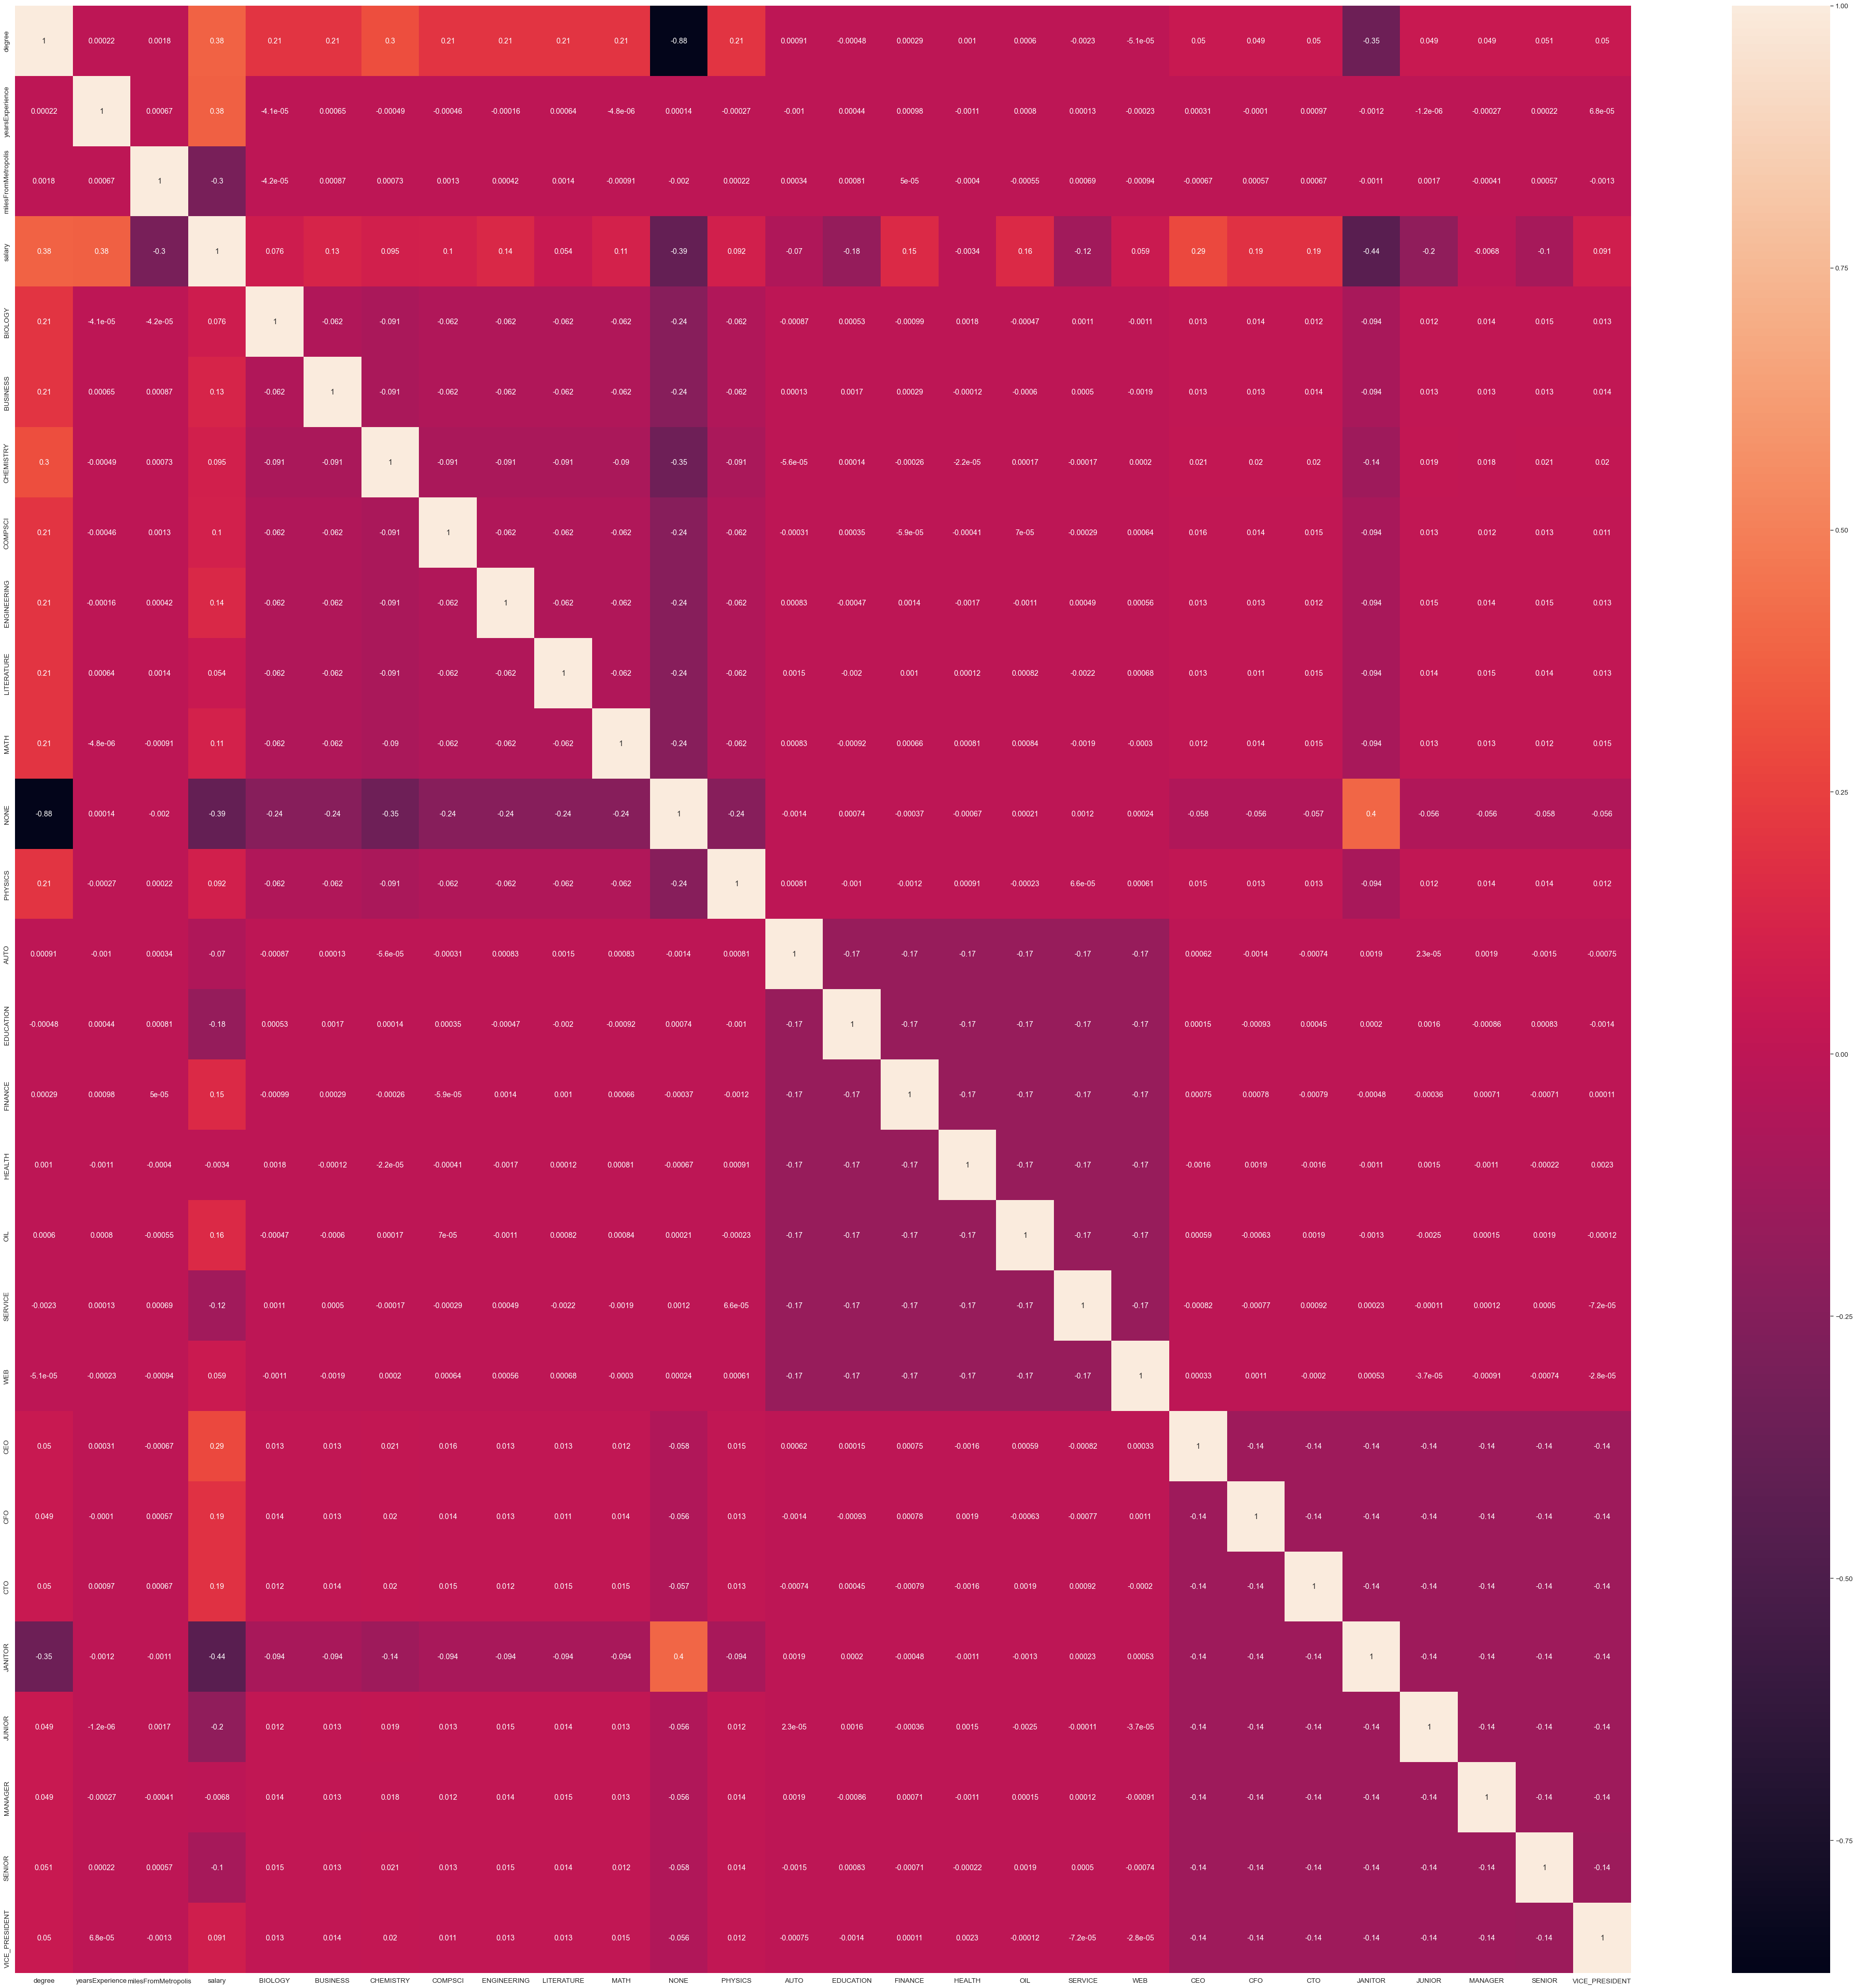

In [142]:
# Correlation Matrix
# the point of correlation matrix is to see which features are causing possible overfitting
# Measures the strength of a relationship between two variables and ranges from -1 to 1

# correlation 
corr = final_df.corr()
top_corr_feat = corr.index
plt.figure(figsize=(70,70))

sns.heatmap(final_df[top_corr_feat].corr(), annot=True)

In [143]:
corr_df = corr.unstack().reset_index() # Unstack correlation matrix 

corr_df.columns = ['feature_1','feature_2', 'correlation'] # rename columns

corr_df.sort_values(by="correlation",ascending=False, inplace=True) # sort by correlation

corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']] # Remove self correlation

corr_df

feature_1 feature_2  correlation
331             NONE   JANITOR     0.398241
655          JANITOR      NONE     0.398241
3             degree    salary     0.384044
84            salary    degree     0.384044
31   yearsExperience    salary     0.375013
..               ...       ...          ...
95            salary      NONE    -0.392479
107           salary   JANITOR    -0.441676
647          JANITOR    salary    -0.441676
308             NONE    degree    -0.876627
11            degree      NONE    -0.876627

[756 rows x 3 columns]

In [144]:
final_df

degree  yearsExperience  milesFromMetropolis  salary  BIOLOGY  \
0            3         0.416667             0.838384     130      0.0   
1            1         0.125000             0.737374     101      0.0   
2            4         0.416667             0.383838     137      0.0   
3            4         0.333333             0.171717     142      0.0   
4            2         0.333333             0.161616     163      0.0   
...        ...              ...                  ...     ...      ...   
999990       2         1.000000             0.646465      79      0.0   
999991       4         0.875000             0.313131     131      0.0   
999992       3         0.041667             1.000000     124      0.0   
999993       3         0.250000             0.050505     149      0.0   
999994       2         0.833333             0.111111      88      0.0   

        BUSINESS  CHEMISTRY  COMPSCI  ENGINEERING  LITERATURE  ...  SERVICE  \
0            0.0        0.0      0.0          0.0         0.0  ...      0.0   
1            0.0        0.0      0.0          0.0         0.0  ...      0.0   
2            0.0        0.0      0.0          0.0         0.0  ...      0.0   
3            0.0        1.0      0.0          0.0         0.0  ...      0.0   
4            0.0        0.0      0.0          0.0         0.0  ...      0.0   
...          ...        ...      ...          ...         ...  ...      ...   
999990       0.0        1.0      0.0          0.0         0.0  ...      1.0   
999991       0.0        1.0      0.0          0.0         0.0  ...      0.0   
999992       0.0        1.0      0.0          0.0         0.0  ...      0.0   
999993       0.0        1.0      0.0          0.0         0.0  ...      0.0   
999994       0.0        1.0      0.0          0.0         0.0  ...      0.0   

        WEB  CEO  CFO  CTO  JANITOR  JUNIOR  MANAGER  SENIOR  VICE_PRESIDENT  
0       0.0  0.0  1.0  0.0      0.0     0.0      0.0     0.0             0.0  
1       1.0  1.0  0.0  0.0      0.0     0.0      0.0     0.0             0.0  
2       0.0  0.0  0.0  0.0      0.0     0.0      0.0     0.0             1.0  
3       0.0  0.0  0.0  0.0      0.0     0.0      1.0     0.0             0.0  
4       0.0  0.0  0.0  0.0      0.0     0.0      0.0     0.0             1.0  
...     ...  ...  ...  ...      ...     ...      ...     ...             ...  
999990  0.0  0.0  0.0  0.0      0.0     1.0      0.0     0.0             0.0  
999991  0.0  0.0  0.0  0.0      0.0     1.0      0.0     0.0             0.0  
999992  0.0  0.0  1.0  0.0      0.0     0.0      0.0     0.0             0.0  
999993  0.0  0.0  1.0  0.0      0.0     0.0      0.0     0.0             0.0  
999994  0.0  0.0  0.0  0.0      0.0     1.0      0.0     0.0             0.0  

[999995 rows x 28 columns]

In [145]:
# splitting our data for target and features
X = final_df.drop(columns=['salary'])
y = final_df['salary']

<h2>b) Linear Models (Lasso, Ridge, ElasticNet, SGDRegressor...) </h2>

In [146]:
# instantiate model
model = LinearRegression() 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
cv_score = cross_validate(model,X_train, y_train, cv=5)
cv_score['test_score'].mean()

0.7427829487503702

In [159]:
#grid search 

<h2> c) Random Forest Model </h2>

<p> Random Forest Model</p>

In [157]:
from sklearn.ensemble import RandomForestRegressor

# instantiate model
rf = RandomForestRegressor()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
# examine scores
cv_scores = cross_validate(rf,X_train,y_train, cv=5)

{'fit_time': array([2.08062291, 1.98566389, 1.97783089, 1.96050406, 1.96133327]),
 'score_time': array([0.0159111 , 0.01016092, 0.00548506, 0.00536609, 0.00581765]),
 'test_score': array([0.74119396, 0.74322605, 0.74333199, 0.74364166, 0.74252107])}

In [160]:
cv_scores['test_score'].mean()

0.7046796912727237

In [ ]:
rf.fit(X_train, y_train)

In [ ]:
from sklearn import metrics
# results of MAE
print(metrics.mean_absolute_error(y_test, y_pred))
# print results of MSE
print(metrics.mean_squared_error(y_test, y_pred))
# print results of RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [167]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [158]:
#Hyper-tuning with Grid Search 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
SUBJECT TO CHANGE AT THE BOTTOM

model = RandomForestRegressor()
# hyperparamteres

#number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=100, stop= 1000, num = 10)] 
#number of features to consider at every split
max_features = ['auto','sqrt']
#maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5,30, num=6)]
#minimum number of sammples required to split a node
min_samples_split=[2,5,10,15,100]
#minumim number of samples required at each leaf node 
min_samples_leaf = [1,2,5,10]



# create the random grid
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

<h2>d) KNN </h2>

In [ ]:
# # dropping our jobId but picking it back up for our end predictions
# output = pd.DataFrame({'jobId': testing_features_df['jobId'], 'Salary': predictions})
# #CHANGE THE SUBMISSION.CSV NAME
# output.to_csv('submission.csv', index=False)